In [42]:
import pandas as pd
import numpy as np
import scipy as scp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

###  Coba pake GB Classifier

In [43]:
training = pd.read_csv('BRI Base Modelling.csv')

training.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,year_graduated,job_duration_from_training,branch_rotation,job_rotation,...,personcat,employeecat,educationcat,maritalcat,AB,B,BC,C,D,T
0,1.352775,1.352775,1.732051,2,35,1,9,4,2,3,...,2,0,0,1,0,1,0,0,0,0
1,1.292285,1.292285,1.039230,2,31,0,13,4,4,3,...,2,0,1,1,0,1,0,0,0,0
2,2.565151,2.308679,1.780449,1,50,1,31,28,10,9,...,5,2,1,1,0,0,0,0,0,1
3,2.828427,1.000000,1.385641,2,53,2,33,29,11,6,...,5,0,1,1,0,0,0,0,0,1
4,2.828427,2.828427,0.707107,2,55,3,35,30,9,8,...,5,0,1,1,0,1,0,0,0,0


#### ini aku coba si data dijadiin ordinal gitu soalnya tadinya error gatau knp

In [44]:
training['Jenis JG Person Level'] = training['Jenis JG Person Level'].map({
    'JG04 Person 0' : 2, 
    'JG05 Person 1' : 5, 
    'JG05 Person 0' : 4, 
    'JG04 Person 1' : 3,
    'JG03 Person 1' : 1,
    'JG03 Person 0' : 0})

training['Jenis JG Job Level'] = training['Jenis JG Job Level'].map({
    'JG04 Job' : 1,
    'JG05 Job 1' : 3, 
    'JG05 Job 0' : 2, 
    'JG03 Job' : 0
})

training['Jenis JG Branch Level'] = training['Jenis JG Branch Level'].map({
    'JG04 Branch 1' : 2,
    'JG04 Branch 0' : 1, 
    'JG05 Branch 3' : 6 , 
    'JG03' : 0,
    'JG05 Branch 0' : 3, 
    'JG05 Branch 1' : 4, 
    'JG05 Branch 2' : 5
    
})

training = training.dropna()

In [45]:
X = training.drop('Best Performance',axis=1).copy()
y = training['Best Performance']

In [46]:
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Mean Accuracy: 0.852 (0.001)


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [48]:
model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
from sklearn.metrics import classification_report

xxx = classification_report(y_test,model.predict(X_test))

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
print(xxx)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2366
           1       0.00      0.00      0.00       422

    accuracy                           0.85      2788
   macro avg       0.42      0.50      0.46      2788
weighted avg       0.72      0.85      0.78      2788



### Ini kalo pake perubahan n cabang

In [51]:
def get_models():
    models = dict()
    n_trees = [2,10,20, 50, 100, 500]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>2 0.853 (0.000)
>10 0.853 (0.000)
>20 0.853 (0.001)
>50 0.853 (0.001)
>100 0.852 (0.001)
>500 0.849 (0.002)


NameError: name 'pyplot' is not defined

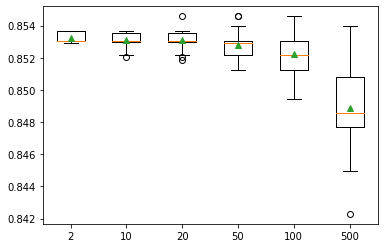

In [52]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Regressor GB

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

xx = GradientBoostingRegressor(random_state=1)

In [54]:
xx.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
a = xx.predict(X_test)
print('MAE : ',mean_absolute_error(a,y_test))
print('MSE : ',mean_squared_error(a,y_test))

MAE :  0.2480912028899125
MSE :  0.12757486906487306


In [56]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(xx, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

MAE: -0.247 (0.007)


### KN-Regressor dan Classifier
- Pake ini soalnya keren aja hehe

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [59]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
a = model.predict(X_test)

In [71]:
x = pd.Series(a).value_counts()

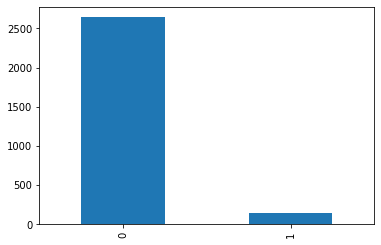

In [74]:
x.plot(kind='bar')

In [76]:
cross_val_score(model,X,y)

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.82060247, 0.81118881, 0.81808396])

In [83]:
print(classification_report(a,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      2640
           1       0.05      0.14      0.07       148

    accuracy                           0.81      2788
   macro avg       0.50      0.49      0.48      2788
weighted avg       0.90      0.81      0.85      2788



In [84]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

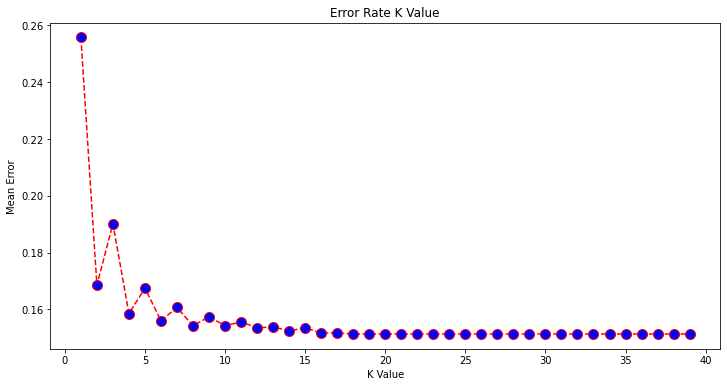

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

>2 0.837 (0.005)
>5 0.834 (0.005)
>10 0.852 (0.001)
>20 0.853 (0.000)
>30 0.853 (0.000)
>40 0.853 (0.000)


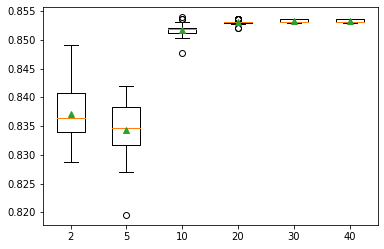

In [93]:
def get_models():
    models = dict()
    n_trees = [2,5,10, 20, 30, 40]
    for n in n_trees:
        models[str(n)] = KNeighborsClassifier(n_neighbors=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [88]:
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.8486370157819225

##### Tinggi juga ya